In [30]:
# importar os pacotes necessaios
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
# importar o arquivo listing.csv para um dataframe
df = pd.read_csv("http://data.insideairbnb.com/spain/catalonia/barcelona/2022-06-07/visualisations/listings.csv")
#mostrar as 5 primeiras linhas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.40556,2.17262,Entire home/apt,220,1,27,2022-05-30,0.25,35,139,6,HUTB-002062
1,23289992,Hab privada en gran vía 2,173385037,Orlando,Sants-Montjuïc,Sants - Badal,41.36484,2.12094,Private room,300,1,0,NaN,NaN,2,178,0,NaN
2,50627552,Casa Nanit Hostal habitacion 2,370718107,Alexandre,Sants-Montjuïc,Sants - Badal,41.37048,2.12916,Private room,140,1,28,2022-06-03,2.49,29,131,28,HB004926
3,592553071373622034,TRAVEL TIME RENT FOR MONTHS,115783949,Rosa María,Sants-Montjuïc,la Bordeta,41.36786,2.12831,Entire home/apt,61,31,0,NaN,NaN,28,236,0,NaN
4,25502628,COOL ROOM NEAR FC BARCELONA FREE WIFI/AC,192451624,Peter,Sants-Montjuïc,Sants - Badal,41.37497,2.12264,Private room,112,4,0,NaN,NaN,2,67,0,NaN


In [32]:
df.shape

(16646, 18)

In [33]:
# identificar o volume de dados do dataframe
print(f"entradas:\t {df.shape[0]}")
print(f"variaveis:\t {df.shape[1]}\n")
print("tipos de variaveis\n")
#verificar os tipos de variaveis
df.dtypes

entradas:	 16646
variaveis:	 18

tipos de variaveis



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [34]:
# ordenar em ordem decrescente as variaveis por seus valores ausentes
(df.isnull().sum()).sort_values(ascending=False) / df.shape[0] * 100

license                           31.424967
reviews_per_month                 22.113421
last_review                       22.113421
name                               0.060074
host_name                          0.030037
minimum_nights                     0.000000
number_of_reviews_ltm              0.000000
availability_365                   0.000000
calculated_host_listings_count     0.000000
number_of_reviews                  0.000000
id                                 0.000000
room_type                          0.000000
longitude                          0.000000
latitude                           0.000000
neighbourhood                      0.000000
neighbourhood_group                0.000000
host_id                            0.000000
price                              0.000000
dtype: float64

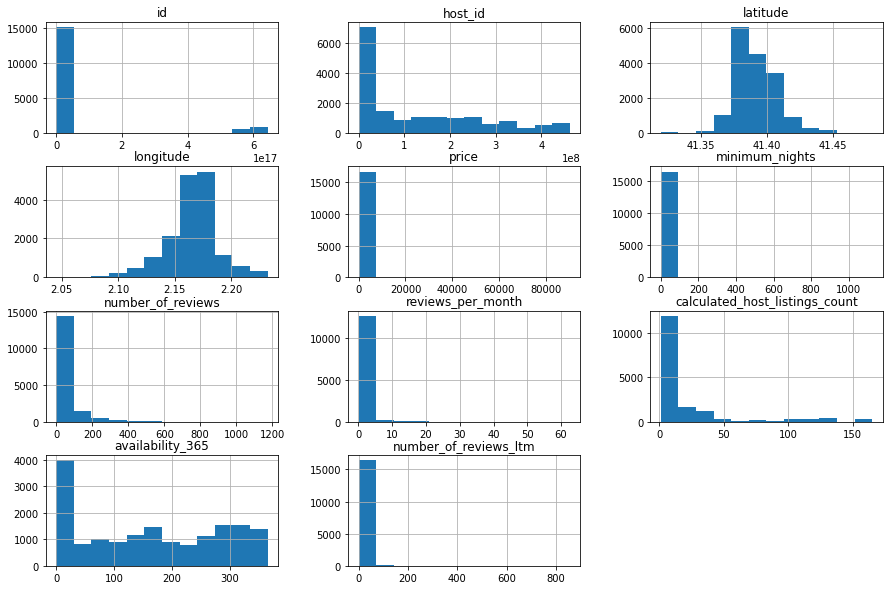

In [35]:
# plotar o historograma das variaveis numericas
df.hist(bins=12, figsize=(15,10));

In [36]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.664600e+04,1.664600e+04,16646.000000,16646.000000,16646.000000,16646.000000,16646.000000,12965.000000,16646.000000,16646.000000,16646.000000
mean,5.397653e+16,1.283119e+08,41.391710,2.165227,195.772318,13.172173,40.470563,1.286565,19.033041,161.719092,9.802415
std,1.709425e+17,1.360662e+08,0.016307,0.022418,934.605061,35.090821,74.920956,1.728210,34.842856,122.895483,20.186191
min,1.867400e+04,3.073000e+03,41.319310,2.045080,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,1.701951e+07,9.478280e+06,41.380012,2.155046,48.000000,1.000000,1.000000,0.210000,1.000000,36.000000,0.000000
50%,3.284573e+07,6.647577e+07,41.389365,2.167162,100.000000,3.000000,7.500000,0.780000,4.000000,158.000000,2.000000
75%,4.710975e+07,2.268047e+08,41.401855,2.177420,222.000000,30.000000,45.000000,1.840000,18.000000,279.000000,12.000000
max,6.439618e+17,4.621742e+08,41.479980,2.232090,90000.000000,1124.000000,1175.000000,62.620000,165.000000,365.000000,856.000000


In [37]:
# ver a media da coluna price
df.price.mean()

195.77231767391567

In [39]:
q1_price = df.price.quantile(0.25)
q3_price = df.price.quantile(0.75)
IQR_price = q3_price - q1_price
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price
print(f'''variavel price=> Q1={q1_price},
   Q3={q3_price},
   IQR={IQR_price},
   limite superior={sup_price},
   limite inferior={inf_price}''')

#vamos criar um ponto de corte para quantidade mínimas de noites
q1_minimum_nights = df.minimum_nights.quantile(0.25)
q3_minimum_nights = df.minimum_nights.quantile(0.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print(f'''Variável mininum_nights=> Q1={q1_minimum_nights},
    Q3={q3_minimum_nights},
    IQR={IQR_minimum_nights},
    Limite superior{sup_minimum_nights},
    Limite inferior{inf_minimum_nights}''')

variavel price=> Q1=48.0,
   Q3=222.0,
   IQR=174.0,
   limite superior=483.0,
   limite inferior=-213.0
Variável mininum_nights=> Q1=1.0,
    Q3=30.0,
    IQR=29.0,
    Limite superior73.5,
    Limite inferior-42.5


minimum_nigths: valores acima de 73.5 dicas:
318_entradas
1.91%


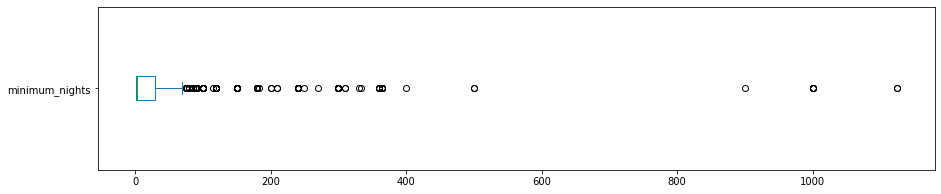

In [44]:
df.minimum_nights.plot(kind='box',vert=False, figsize=(15, 3));
#ver a quantidade de valores acima de sup_minimum_ nights para minimum_nights
print(f"minimum_nigths: valores acima de {sup_minimum_nights} dicas:")
print(f"{len(df[df.minimum_nights > sup_minimum_nights])}_entradas")
print(f"{len(df[df.minimum_nights > sup_minimum_nights])/df.shape[0]*100:.4}%")

In [ ]:
df_clean = df.copy()
df_clean[df_clean.price >sup_price].index

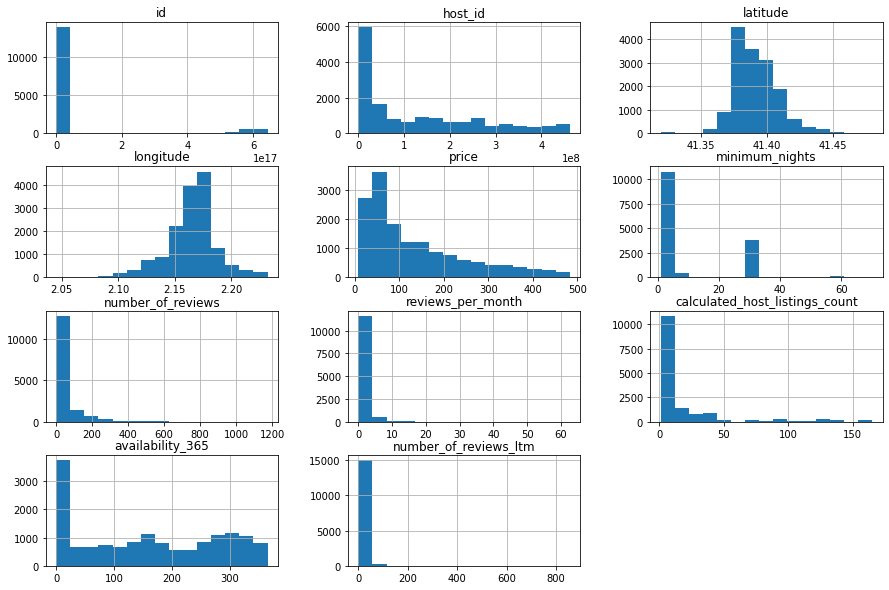

In [46]:
#eliminando linhas com outlayers
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > sup_price].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price ==0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > sup_minimum_nights].index, axis=0, inplace=True)

#histograma apos limpeza de dados
df_clean.hist(bins=15, figsize=(15,10));


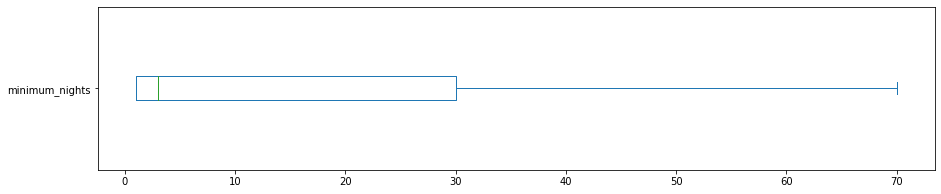

In [49]:
#boxplot minimum_nights apos retirar outliers
df_clean.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3));

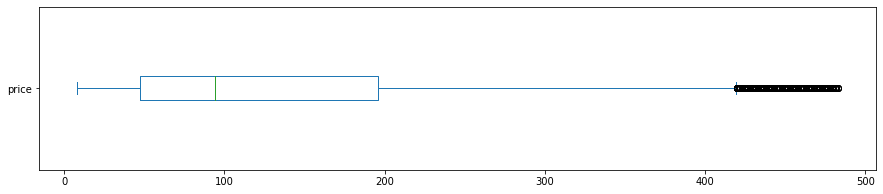

In [47]:
#boxplot price apos retirar outliers
df_clean.price.plot(kind='box', vert=False, figsize=(15, 3));

In [50]:
#mostrar a quantidade de cada tipo de imovel disponivel
df_clean.room_type.value_counts()

Entire home/apt    8690
Private room       6337
Hotel room          171
Shared room         155
Name: room_type, dtype: int64

In [51]:
#mostrar a porcertagem de cada tipo d eimovel disponivel
df_clean.room_type.value_counts()/df_clean.shape[0]*100

Entire home/apt    56.601316
Private room       41.275321
Hotel room          1.113789
Shared room         1.009575
Name: room_type, dtype: float64

Entire home/apt    56.601316
Private room       41.275321
Hotel room          1.113789
Shared room         1.009575
Name: room_type, dtype: float64


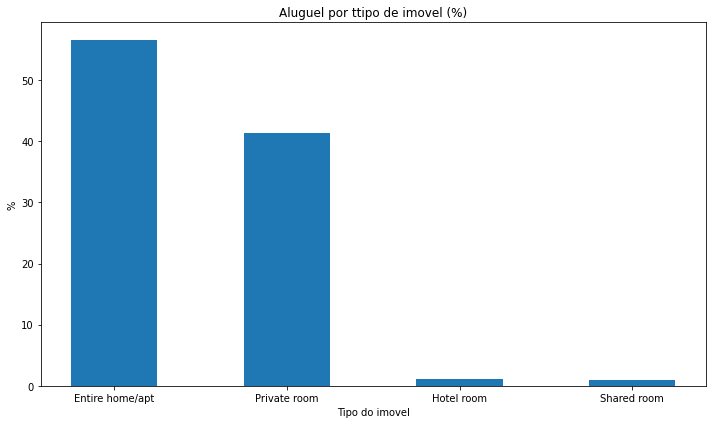

In [55]:
tipo_acomodacao = (df_clean.room_type.value_counts()/df_clean.shape[0]*100).sort_values(ascending=False)

print(tipo_acomodacao)
df_acomodacao = pd.DataFrame([tipo_acomodacao.keys(),tipo_acomodacao.values]).transpose()
df_acomodacao.columns=['Tipo_Acomodacao', 'Porcetagem']

fig, ax = plt.subplots(figsize=(10,6))
tipo_acomodacao = ax.bar(df_acomodacao['Tipo_Acomodacao'],df_acomodacao['Porcetagem'],0.5, label = 'Porcetagem')

ax.set_title("Aluguel por ttipo de imovel (%)")
ax.set_xlabel("Tipo do imovel")
ax.set_ylabel("%")

plt.tight_layout()

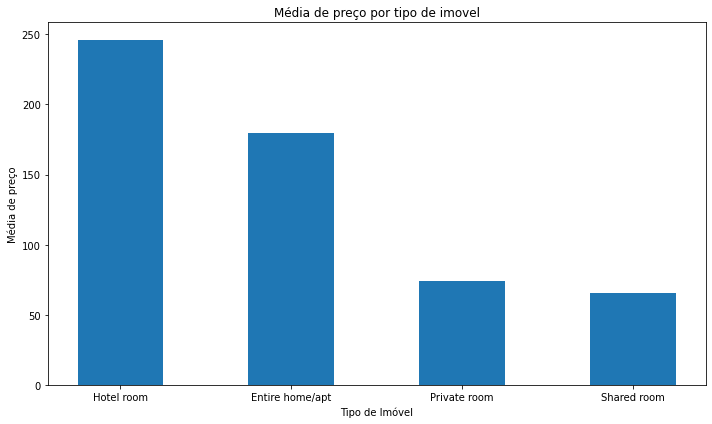

In [60]:
tipo_acomodacao = (df_clean.groupby('room_type').price.mean().sort_values(ascending=False))
df_acomodacao = pd.DataFrame([tipo_acomodacao.keys(),tipo_acomodacao.values]).transpose()
df_acomodacao.columns=['Room_type', 'Mean']

fig, ax = plt.subplots(figsize=(10,6))
tipo_acomodacao = ax.bar(df_acomodacao['Room_type'],df_acomodacao['Mean'],0.5, label = 'Média')

ax.set_title("Média de preço por tipo de imovel")
ax.set_xlabel("Tipo de Imóvel")
ax.set_ylabel("Média de preço")

plt.tight_layout()